In [1]:
## Read table, combine table, parse the time string, save to pkl
## Visualize the excursion event
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np
from scipy.fftpack import fft, ifft
from scipy import signal
import numpy as np
pd.set_option('display.max_columns', 51)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 32}
plt.rc('font', **font)
%matplotlib inline

In [4]:
# file1_df = pd.read_table("../data/Hackathon_DataSet_OctApr_Part1.txt", sep='\t', header=0)
# file2_df = pd.read_table("../data/Hackathon_DataSet_OctApr_Part2.txt", sep='\t', header=0)

In [21]:
# file1_df["Time"] = pd.to_datetime(file1_df["TimeStamp"],infer_datetime_format=True)
# file2_df["Time"] = pd.to_datetime(file2_df["TimeStamp"], infer_datetime_format=True)

In [2]:
# file1_df.to_pickle("../data/Part1.pkl")
# file2_df.to_pickle("../data/Part2.pkl")
# file1_df = pd.read_pickle("../data/Part1.pkl")
# file2_df = pd.read_pickle("../data/Part2.pkl")
file_df = pd.read_pickle("../data/combined.pkl")

In [3]:
file_df.head(2)

,Id_x,hackathon4_x,TimeStamp_x,05-PT-28201-01_B2_Manifold_Pressure (Psi),05-PT-28201-03_B2_Manifold_Pressure (Psi),05-PT-29101-02_C1_Manifold_Pressure (Psi),05-PT-29101-03_C1_Manifold_Pressure (Psi),05-PT-33101-02_G1_Manifold_Pressure (Psi),05-PT-33101-03_G1_Manifold_Pressure (Psi),05-PT-34101-01_H1_Manifold_Pressure (Psi),05-PT-34101-04_H1_Manifold_Pressure (Psi),05-TT-28201-01_B2_Manifold_Temperature (DegF),05-TT-28201-03_B2_Manifold_Temperature (DegF),05-TT-29101-02_C1_Manifold_Temperature (DegF),05-TT-29101-03_C1_Manifold_Temperature (DegF),05-TT-33101-02_G1_Manifold_Temperature (DegF),05-TT-33101-03_G1_Manifold_Temperature (DegF),05-TT-34101-01_H1_Manifold_Temperature (DegF),05-TT-34101-04_H1_Manifold_Temperature (DegF),20-HX-10003.Status_Flowline_From_Drill_Center_C ( ),20-HX-10004.Status_Flowline_From_Drill_Center_C ( ),20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( ),20-HX-20004.Status_Flowline_From_Drill_Centers_B&G ( ),20-PIC-10114.PV_P2_Subsea_Flowline_Eq_Choke_%_Open (PSIG),20-PIC-10214.PV_P1_Subsea_Flowline_Eq_Choke_%_Open (PSIG),...,21-TT-10508.PV_Prod_Sep_Gas_Out_To_Flash_Clr (Deg.F),21-TT-10608.PV_Prod_Sep_2nd_Stg_Gas_Out (Deg.F),21-TT-11616.PV_Crude_Oil_Trim_Heat_Outlet (Deg.F),30-FT-19107-01.PV_2nd_Stg_Hydrocyclone_Inlet (BPD),30-FT-19108.PV ( ),30-FT-29108.PV (BPD),30-FT-69521-01.PV_Flotation_Cell_Prod_Wtr_To_Ovbrd (BPD),30-LIC-69516.CV_Flotation_Cell_Out_To_Drn (%),30-LIC-69518.CV_Flotation_Cell_Prod_Wtr_To_Ovbrd (%),30-LT-69514.PV_Flotation_Cell (%),30-LT-69515.PV_Flotation_Cell (%),30-LT-69516.PV_Flotation_Cell (%),30-LT-69518.PV_Flotation_Cell (%),30-LY-69518.OUT_Flotation_Cell_Prod_Wtr_To_Ovbrd (%),30-PDIC-19104.SP_2nd_Stg_Prod_Hydrocyclone_Out ( ),30-PDT-19104-01.PV_2nd_Stg_Hydrocyclone_Out_To_Drn (PSID),30-PDT-19104-02.PV_2nd_Stg_Hydrocyclone_To_Skimmer (PSID),30-PDT-19104.PV_2nd_Stg_Hydrocyclone_Out_To_Drn_Diff_Press_Ratio (PSID),30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%),30-PT-69503.PV_Flotation_Cell (PSIG),30-PT-69512.PV (psig),30-PY-69503.OUT_Flotation_Cell_Out_To_LP_Flare (%),37-PT-62301.PV_Closed_Smp_Tk_Pmp_Disch_To_Sep (PSIG),PIIntTSTicks_y,PIIntShapeID_y
0,1,hackathon4,10/20/2016 12:00:00 AM,966.381897,1004.695740,1754.83667,911.066284,1061.527222,1025.542603,958.443115,1723.516602,162.461395,142.916428,40.297356,111.148277,152.158524,41.248680,102.671295,41.268318,Closed,Open,Open,FAIL,187.473465,254.913010,...,73.130829,125.887375,129.744720,4.189253,5742.936035,4736.10498,12053.009766,0.0,39.519337,31.173611,76.055481,28.691677,78.771912,39.519337,1.0,9.768112,9.703619,0.965848,42.564075,3.296184,2.667331,0.0,-1.208175,636125364000000000,0
1,2,hackathon4,10/20/2016 12:00:30 AM,966.362854,1004.681519,1754.71460,911.771423,1061.473511,1025.534912,958.766968,1725.141846,162.352066,142.916046,40.297363,111.129425,152.138550,41.248692,102.635017,41.268200,Closed,Open,Open,FAIL,187.368179,227.374268,...,73.107445,125.678886,130.235901,3.864418,5708.892090,4735.89502,12977.514648,0.0,43.453060,31.404886,76.023933,28.772745,78.678864,43.453060,1.0,9.773479,9.755747,0.965457,42.561581,3.255860,2.631529,0.0,-0.869427,636125364300000000,0


In [6]:
# print(len(file1_df), len(file2_df))

In [69]:
## Join the two tables
# file_df = pd.merge(file1_df, file2_df, on="Time")
# file_df.to_pickle("../data/combined.pkl")

In [7]:
file_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469681 entries, 0 to 469680
Data columns (total 93 columns):
Id_x                                                                       469681 non-null int64
hackathon4_x                                                               469681 non-null object
TimeStamp_x                                                                469681 non-null object
05-PT-28201-01_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-28201-03_B2_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-02_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-29101-03_C1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-02_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05-PT-33101-03_G1_Manifold_Pressure (Psi)                                  469681 non-null float64
05

In [4]:
file_df.head(5)

,Id_x,hackathon4_x,TimeStamp_x,05-PT-28201-01_B2_Manifold_Pressure (Psi),05-PT-28201-03_B2_Manifold_Pressure (Psi),05-PT-29101-02_C1_Manifold_Pressure (Psi),05-PT-29101-03_C1_Manifold_Pressure (Psi),05-PT-33101-02_G1_Manifold_Pressure (Psi),05-PT-33101-03_G1_Manifold_Pressure (Psi),05-PT-34101-01_H1_Manifold_Pressure (Psi),05-PT-34101-04_H1_Manifold_Pressure (Psi),05-TT-28201-01_B2_Manifold_Temperature (DegF),05-TT-28201-03_B2_Manifold_Temperature (DegF),05-TT-29101-02_C1_Manifold_Temperature (DegF),05-TT-29101-03_C1_Manifold_Temperature (DegF),05-TT-33101-02_G1_Manifold_Temperature (DegF),05-TT-33101-03_G1_Manifold_Temperature (DegF),05-TT-34101-01_H1_Manifold_Temperature (DegF),05-TT-34101-04_H1_Manifold_Temperature (DegF),20-HX-10003.Status_Flowline_From_Drill_Center_C ( ),20-HX-10004.Status_Flowline_From_Drill_Center_C ( ),20-HX-20003.Status_Flowline_From_Drill_Centers_B&G ( ),20-HX-20004.Status_Flowline_From_Drill_Centers_B&G ( ),20-PIC-10114.PV_P2_Subsea_Flowline_Eq_Choke_%_Open (PSIG),20-PIC-10214.PV_P1_Subsea_Flowline_Eq_Choke_%_Open (PSIG),...,21-TT-10508.PV_Prod_Sep_Gas_Out_To_Flash_Clr (Deg.F),21-TT-10608.PV_Prod_Sep_2nd_Stg_Gas_Out (Deg.F),21-TT-11616.PV_Crude_Oil_Trim_Heat_Outlet (Deg.F),30-FT-19107-01.PV_2nd_Stg_Hydrocyclone_Inlet (BPD),30-FT-19108.PV ( ),30-FT-29108.PV (BPD),30-FT-69521-01.PV_Flotation_Cell_Prod_Wtr_To_Ovbrd (BPD),30-LIC-69516.CV_Flotation_Cell_Out_To_Drn (%),30-LIC-69518.CV_Flotation_Cell_Prod_Wtr_To_Ovbrd (%),30-LT-69514.PV_Flotation_Cell (%),30-LT-69515.PV_Flotation_Cell (%),30-LT-69516.PV_Flotation_Cell (%),30-LT-69518.PV_Flotation_Cell (%),30-LY-69518.OUT_Flotation_Cell_Prod_Wtr_To_Ovbrd (%),30-PDIC-19104.SP_2nd_Stg_Prod_Hydrocyclone_Out ( ),30-PDT-19104-01.PV_2nd_Stg_Hydrocyclone_Out_To_Drn (PSID),30-PDT-19104-02.PV_2nd_Stg_Hydrocyclone_To_Skimmer (PSID),30-PDT-19104.PV_2nd_Stg_Hydrocyclone_Out_To_Drn_Diff_Press_Ratio (PSID),30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%),30-PT-69503.PV_Flotation_Cell (PSIG),30-PT-69512.PV (psig),30-PY-69503.OUT_Flotation_Cell_Out_To_LP_Flare (%),37-PT-62301.PV_Closed_Smp_Tk_Pmp_Disch_To_Sep (PSIG),PIIntTSTicks_y,PIIntShapeID_y
0,1,hackathon4,10/20/2016 12:00:00 AM,966.381897,1004.695740,1754.836670,911.066284,1061.527222,1025.542603,958.443115,1723.516602,162.461395,142.916428,40.297356,111.148277,152.158524,41.248680,102.671295,41.268318,Closed,Open,Open,FAIL,187.473465,254.913010,...,73.130829,125.887375,129.744720,4.189253,5742.936035,4736.104980,12053.009766,0.0,39.519337,31.173611,76.055481,28.691677,78.771912,39.519337,1.0,9.768112,9.703619,0.965848,42.564075,3.296184,2.667331,0.0,-1.208175,636125364000000000,0
1,2,hackathon4,10/20/2016 12:00:30 AM,966.362854,1004.681519,1754.714600,911.771423,1061.473511,1025.534912,958.766968,1725.141846,162.352066,142.916046,40.297363,111.129425,152.138550,41.248692,102.635017,41.268200,Closed,Open,Open,FAIL,187.368179,227.374268,...,73.107445,125.678886,130.235901,3.864418,5708.892090,4735.895020,12977.514648,0.0,43.453060,31.404886,76.023933,28.772745,78.678864,43.453060,1.0,9.773479,9.755747,0.965457,42.561581,3.255860,2.631529,0.0,-0.869427,636125364300000000,0
2,3,hackathon4,10/20/2016 12:01:00 AM,966.271118,1004.667358,1754.900879,911.257996,1061.568604,1025.527344,959.532166,1722.426392,162.450058,142.915680,40.297371,111.122307,152.198746,41.248699,102.665077,41.268085,Closed,Open,Open,FAIL,187.463776,238.891373,...,73.084061,125.470390,130.483276,3.727489,5781.888672,4673.041504,12057.237305,0.0,40.615211,30.981592,75.206039,28.853815,77.945999,40.615211,1.0,9.913736,9.876377,0.965067,42.546371,3.215535,2.564965,0.0,-0.388303,636125364600000000,0
3,4,hackathon4,10/20/2016 12:01:30 AM,966.392029,1004.678101,1754.978882,911.025330,1061.569458,1025.519653,959.556580,1723.165283,162.417374,142.915314,40.297379,111.139427,152.258957,41.248711,102.690414,41.267971,Closed,Open,Open,FAIL,187.391022,238.000229,...,73.060669,125.378426,130.508606,3.976498,5793.321289,4686.755371,12734.086914,0.0,43.652397,30.44

In [ ]:
# Important Columns PT-10605, '20-PT-10007-01.PV_Flowline_From_Drill_Center_C (PSIG)', 

In [5]:
plt.rcParams.update({'font.size': 16})
datefmt = mdates.DateFormatter('%d/%H:%M')
def time_fft(datetime, y):
    '''
    input: array of datetime object
           y signal
    Output: frequency, ABS(signal)
    '''
    N = len(y)
    y_f = np.fft.fft2(y - np.mean(y))
    y_f = y_f[0:int(N/2)] ## Nyquist
    f_max= 1/((datetime[1] - datetime[0]).item()/1e9)/2
    f = np.linspace(0, f_max, len(y_f))
    return f, abs(y_f)
def lp_butter(y, Wn = 0.2):
    n = len(y)
    b, a = signal.butter(4, Wn, 'low')
    output_signal = signal.filtfilt(b, a, y, axis=0)
    return output_signal

def normalize_for_plot(v):
    v_mean=np.mean(v)
    v = v - v_mean
    v_min, v_max = min(v), max(v)
    v = v / max([abs(v_min), abs(v_max)])
    return v
def plot_features(df, start_time, end_time, features, normalized=True, lp_filter = True, legend_on=True):
    '''
    plot the feautres for EDA in different time range
    Feature is suggested to normalize for feature comparison
    '''
    fig, ax = plt.subplots(figsize=(15,8))
    time_range = (df["Time"] < end_time)&(df["Time"] > start_time)
    x = df.loc[time_range,["Time"]].values
    for feature in features:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax.plot(x, y, label = feature)
    ax.xaxis.set_major_formatter(datefmt)
    if legend_on:
        plt.legend(features)
def subplot_features(df, start_time, end_time, features1,features2, features3, 
                     normalized=False, lp_filter = True):
    '''
    plot the feautres for EDA in different time range
    Feature is suggested to normalize for feature comparison
    '''
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,figsize=(15,14))
    time_range = (df["Time"] < end_time)&(df["Time"] > start_time)
    x = df.loc[time_range,["Time"]].values
    for feature in features1:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax1.plot(x, y, label = feature)
    ax1.xaxis.set_major_formatter(datefmt)
    ax1.legend(features1)
    
    for feature in features2:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax2.plot(x, y, label = feature)
    ax2.xaxis.set_major_formatter(datefmt)
    ax2.legend(features2)
    
    for feature in features3:
        y = df.loc[time_range, [feature]].values
        if y[0] is None:
            continue
        if lp_filter:
            y = lp_butter(y, 0.06)
        if normalized:
            y = normalize_for_plot(y)
        ax3.plot(x, y, label = feature)
    ax3.xaxis.set_major_formatter(datefmt)
    ax3.legend(features3, loc="right", framealpha=0.5)


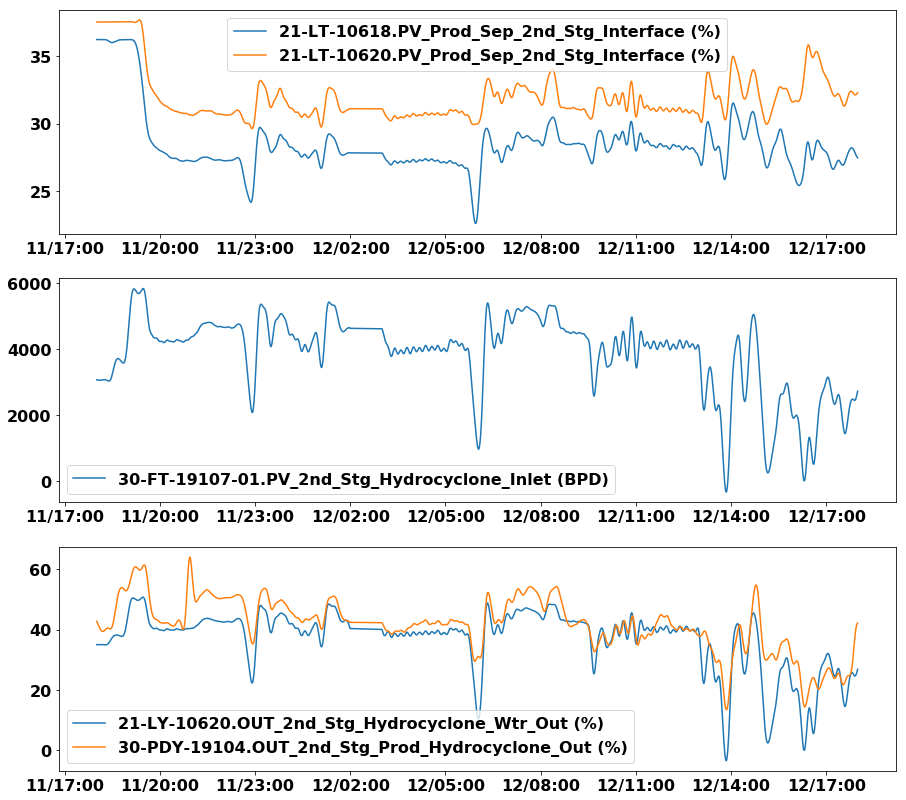

In [36]:
## March 12, 2017
separator_2nd_features_1 = [
                           "21-LT-10618.PV_Prod_Sep_2nd_Stg_Interface (%)",
                           "21-LT-10620.PV_Prod_Sep_2nd_Stg_Interface (%)",
                         ]

separator_2nd_features_2 = [
                            "30-FT-19107-01.PV_2nd_Stg_Hydrocyclone_Inlet (BPD)"
                         ]
separator_2nd_features_3 = [
                            "21-LY-10620.OUT_2nd_Stg_Hydrocyclone_Wtr_Out (%)",
                            "30-PDY-19104.OUT_2nd_Stg_Prod_Hydrocyclone_Out (%)"
                         ]

## March 12, 2017
start_time = datetime(2017, 3, 11,18,0)
end_time = datetime(2017, 3, 12, 18,0)

subplot_features(file_df, start_time, end_time, separator_2nd_features_1, 
                 separator_2nd_features_2, separator_2nd_features_3, 
                 lp_filter=True, normalized=False)

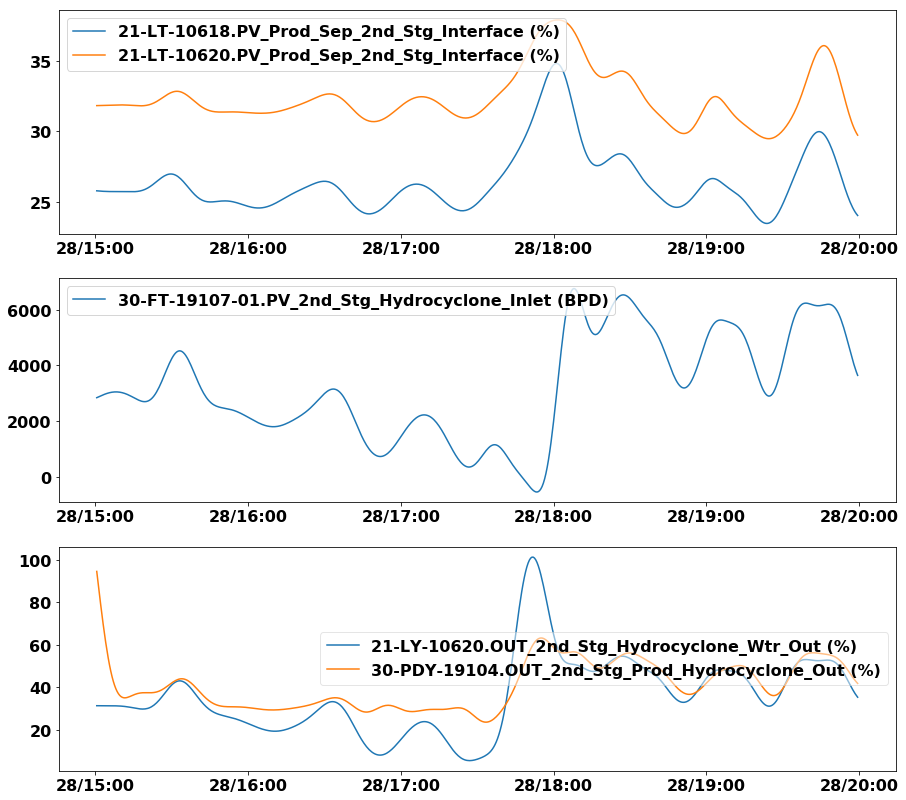

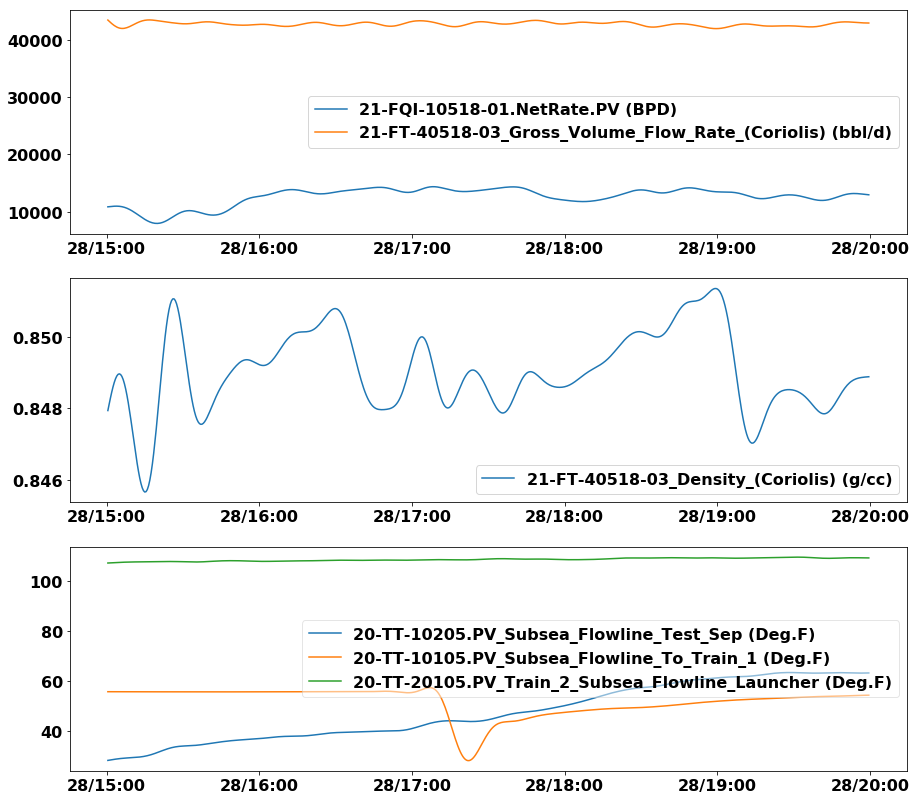

In [54]:
## Jan 28, 2017
separator_2nd_features_4 = [
                           "21-FQI-10518-01.NetRate.PV (BPD)",
                           "21-FT-40518-03_Gross_Volume_Flow_Rate_(Coriolis) (bbl/d)",
                         ]

separator_2nd_features_5 = [
                            "21-FT-40518-03_Density_(Coriolis) (g/cc)"
                         ]
separator_2nd_features_6 = [
                            "20-TT-10205.PV_Subsea_Flowline_Test_Sep (Deg.F)",
                            "20-TT-10105.PV_Subsea_Flowline_To_Train_1 (Deg.F)",
                        "20-TT-20105.PV_Train_2_Subsea_Flowline_Launcher (Deg.F)"
                         ]

start_time = datetime(2017, 1, 28,15,0)
end_time = datetime(2017, 1, 28, 20,0)

subplot_features(file_df, start_time, end_time, separator_2nd_features_1, 
                 separator_2nd_features_2, separator_2nd_features_3, 
                 lp_filter=True, normalized=False)
subplot_features(file_df, start_time, end_time, separator_2nd_features_4, 
                 separator_2nd_features_5, separator_2nd_features_6, 
                 lp_filter=True, normalized=False)

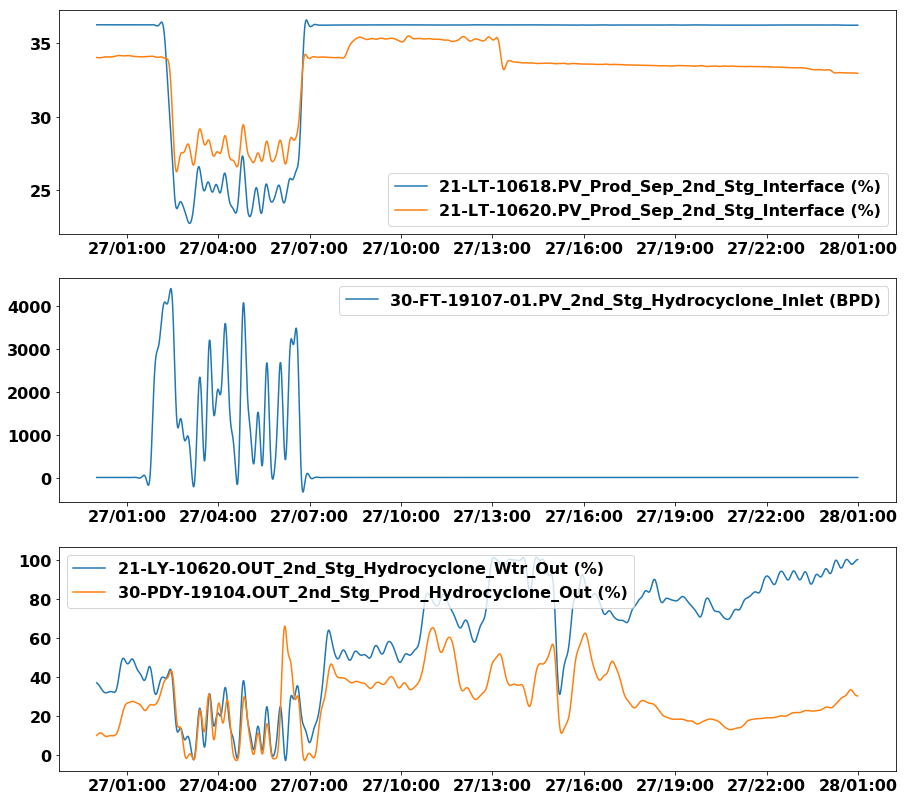

In [38]:
## Nov 27, 2016
start_time = datetime(2016, 11, 27,0,0)
end_time = datetime(2016, 11, 28, 1,0)

subplot_features(file_df, start_time, end_time, separator_2nd_features_1, 
                 separator_2nd_features_2, separator_2nd_features_3, 
                 lp_filter=True, normalized=False)

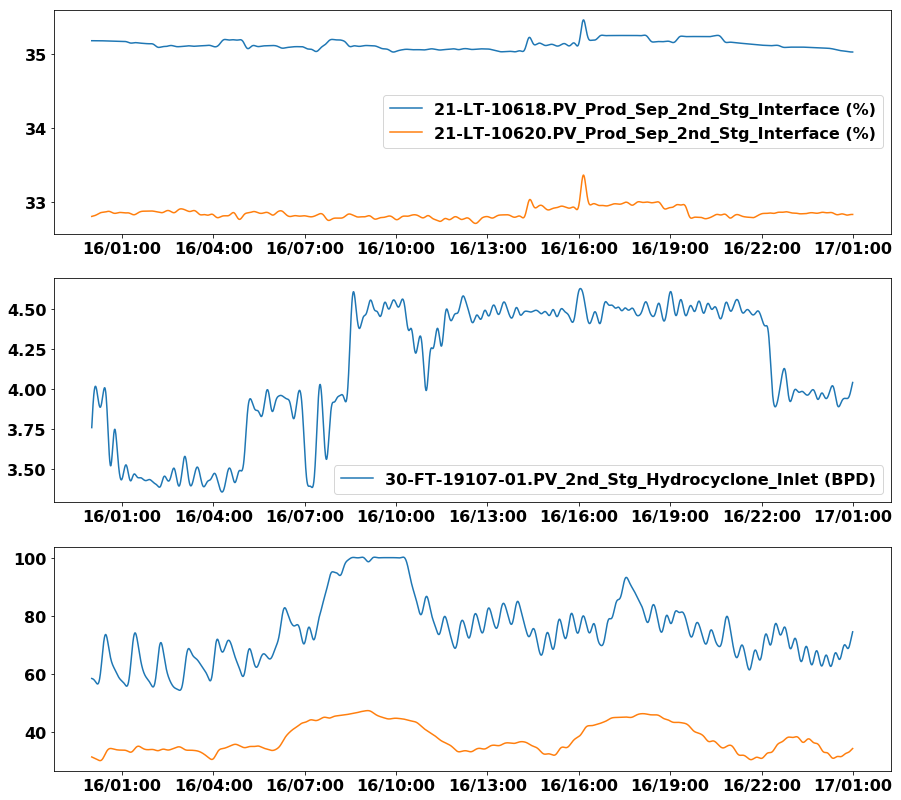

In [42]:
## Nov 16, 2016
start_time = datetime(2016, 11, 16,0,0)
end_time = datetime(2016, 11, 17, 1,0)
subplot_features(file_df, start_time, end_time, separator_2nd_features_1, 
                 separator_2nd_features_2, separator_2nd_features_3, 
                 lp_filter=True, normalized=False)

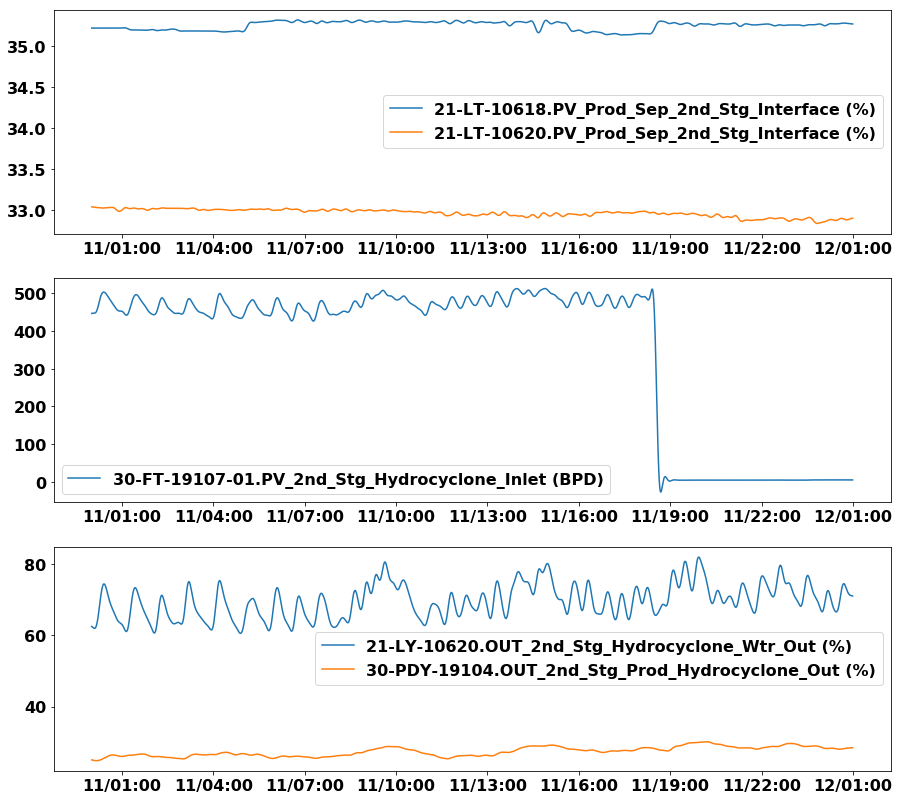

In [45]:
## Nov 11, 2016
start_time = datetime(2016, 11, 11,0,0)
end_time = datetime(2016, 11, 12, 1,0)
subplot_features(file_df, start_time, end_time, separator_2nd_features_1, 
                 separator_2nd_features_2, separator_2nd_features_3, 
                 lp_filter=True, normalized=False)

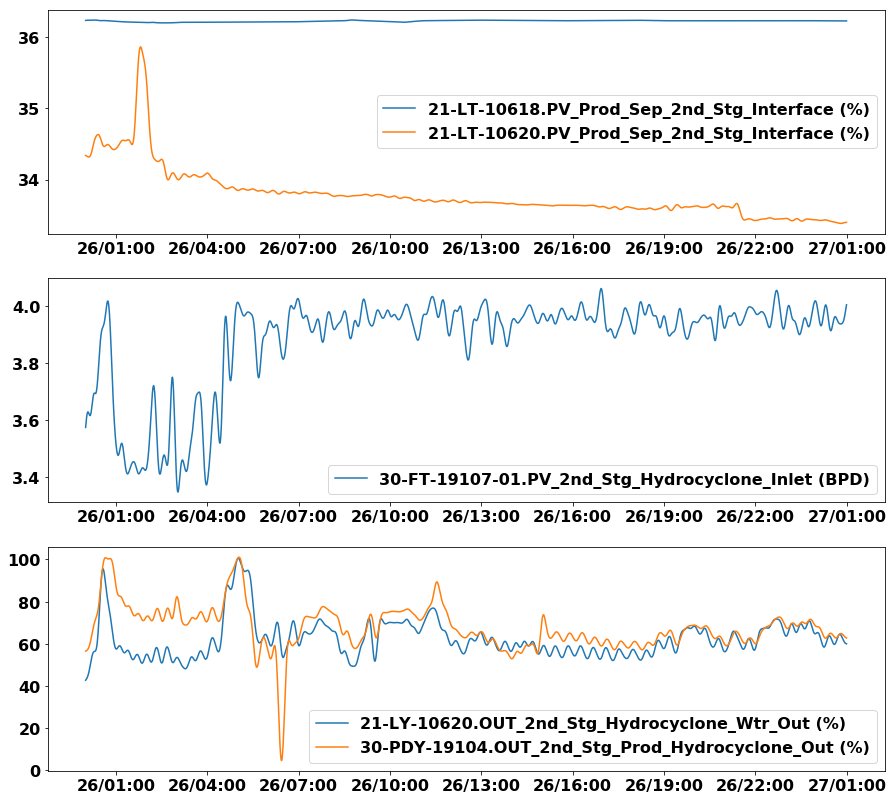

In [46]:
## Oct 26, 2016
start_time = datetime(2016, 10, 26,0,0)
end_time = datetime(2016, 10, 27, 1,0)
subplot_features(file_df, start_time, end_time, separator_2nd_features_1, 
                 separator_2nd_features_2, separator_2nd_features_3, 
                 lp_filter=True, normalized=False)